IMPORTING LIBRARIES/DEPENDENCIES

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [24]:
dataset_dir=('dataset')

In [25]:
import os
from pathlib import Path

In [26]:
# Converting the string to a Path object
dataset_dir = Path(dataset_dir)

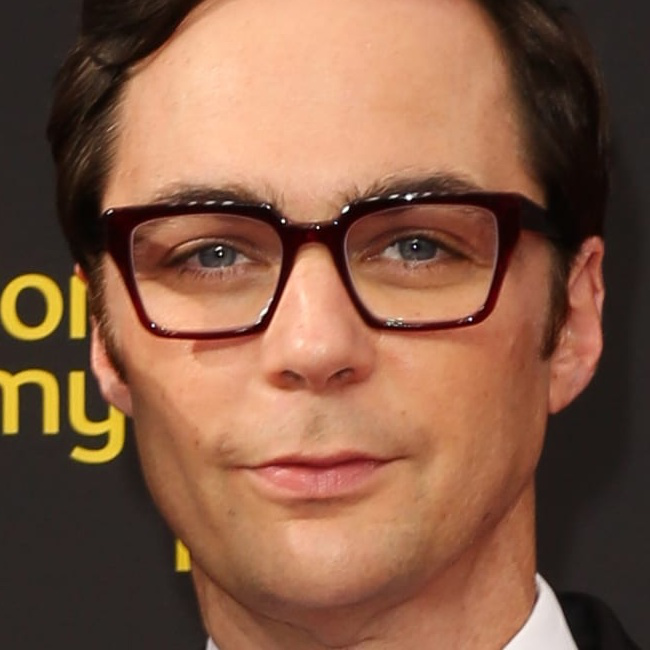

In [27]:
Jim_Parsons= list(dataset_dir.glob('Jim_Parsons/*'))
PIL.Image.open(str(Jim_Parsons[0]))

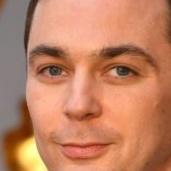

In [28]:
#the second one
PIL.Image.open(str(Jim_Parsons[1]))

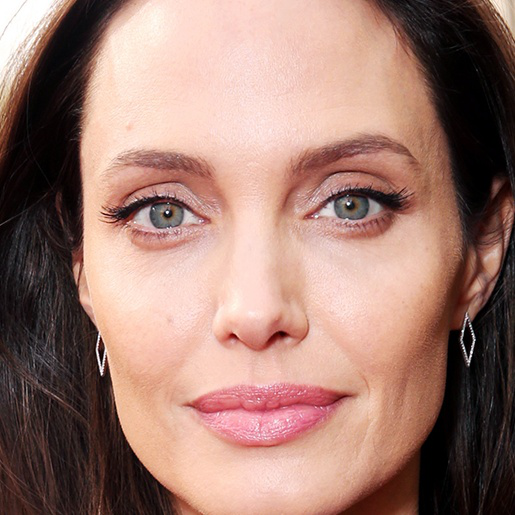

In [29]:
angelina_jolie= list(dataset_dir.glob('angelina_jolie/*'))
PIL.Image.open(str(angelina_jolie[0]))

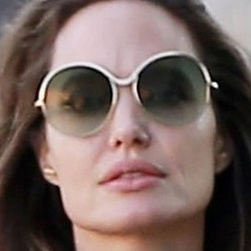

In [30]:
PIL.Image.open(str(angelina_jolie[1]))

In [31]:
#parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15929 files belonging to 31 classes.
Using 9558 files for training.


In [33]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15929 files belonging to 31 classes.
Using 6371 files for validation.


In [34]:
class_names = train_ds.class_names
print(class_names)

['Courteney_Cox', 'David_Schwimmer', 'Jennifer_Aniston', 'Jim_Parsons', 'Johnny_Galeck', 'Kunal_Nayya', 'Lisa_Kudrow', 'Matt_LeBlanc', 'Matthew_Perry', 'Pankaj_Tripathi', 'ROHIT_SHARMA', 'Sachin_Tendulka', 'Simon_Helberg', 'aishwarya_rai', 'angelina_jolie', 'arnold_schwarzenegger', 'bhuvan_bam', 'brad_pitt', 'dhoni', 'hardik_pandya', 'kerubo_Monicah', 'manoj_bajpayee', 'messi', 'mohamed_ali', 'pewdiepie', 'random_person', 'ronaldo', 'scarlett_johansson', 'suresh_raina', 'sylvester_stallone', 'virat_kohli']


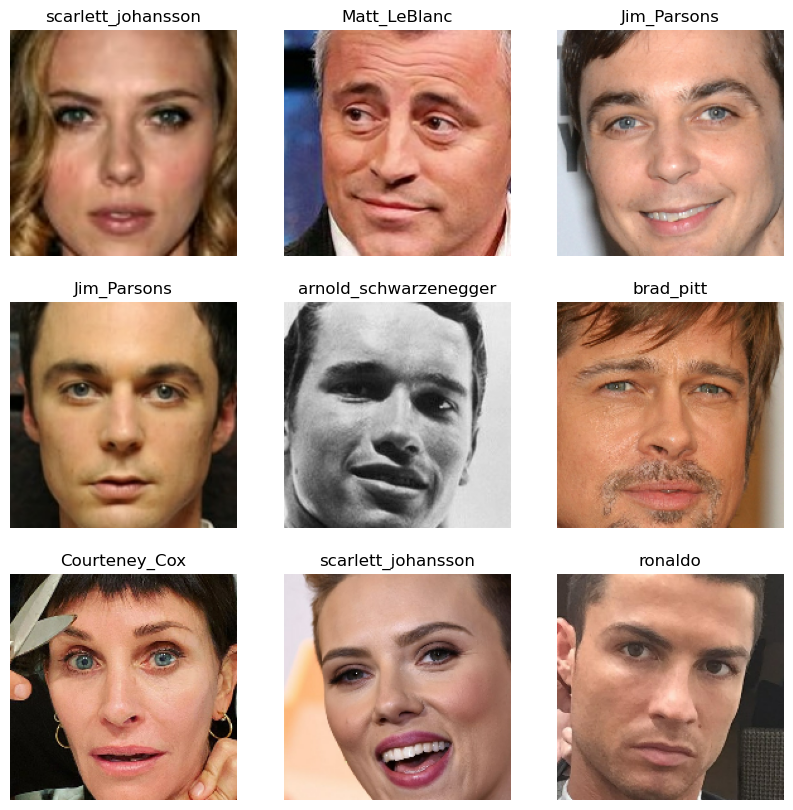

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [35]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
#STANDARDIZING VALUES
normalization_layer = layers.Rescaling(1./255)

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

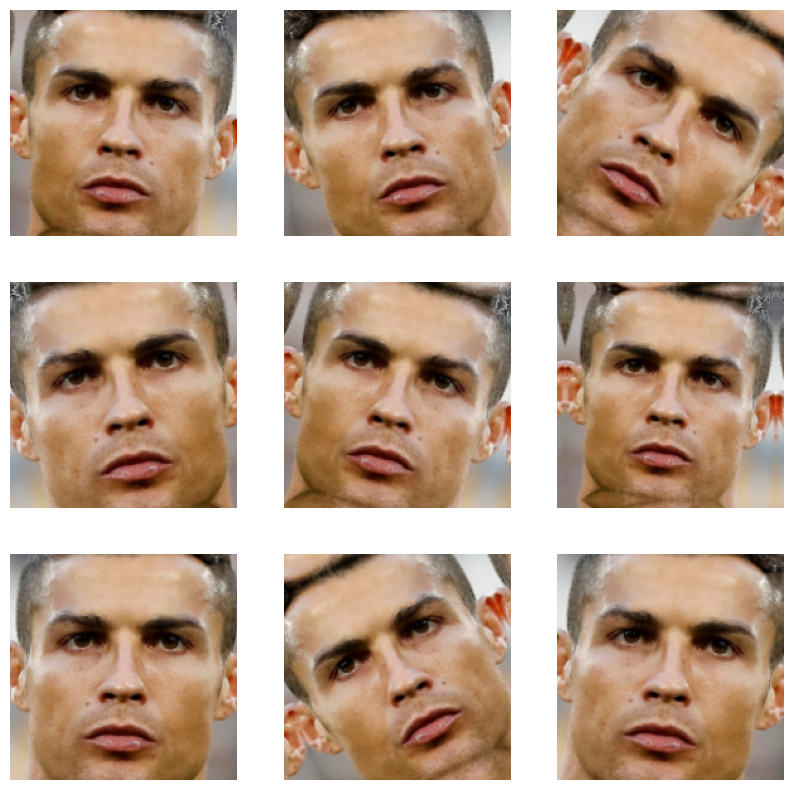

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [39]:
#building the model architecture
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

num_classes = len(class_names)




In [40]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, name="outputs")
])

In [41]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [43]:
epochs=55
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/55
299/299 [==============================] - 620s 2s/step - loss: 3.0511 - accuracy: 0.1586 - val_loss: 2.5675 - val_accuracy: 0.2618
Epoch 2/55
299/299 [==============================] - 452s 2s/step - loss: 2.4490 - accuracy: 0.2845 - val_loss: 1.9906 - val_accuracy: 0.4227
Epoch 3/55
299/299 [==============================] - 455s 2s/step - loss: 2.0824 - accuracy: 0.3896 - val_loss: 1.7583 - val_accuracy: 0.4987
Epoch 4/55
299/299 [==============================] - 459s 2s/step - loss: 1.8435 - accuracy: 0.4643 - val_loss: 1.4909 - val_accuracy: 0.5676
Epoch 5/55
299/299 [==============================] - 463s 2s/step - loss: 1.6489 - accuracy: 0.5143 - val_loss: 1.3743 - val_accuracy: 0.6087
Epoch 6/55
299/299 [==============================] - 463s 2s/step - loss: 1.4930 - accuracy: 0.5639 - val_loss: 1.2768 - val_accuracy: 0.6439
Epoch 7/55
299/299 [==============================] - 477s 2s/step - loss: 1.3833 - accuracy: 0.5888 - val_loss: 1.1931 - val_accuracy: 0.6658

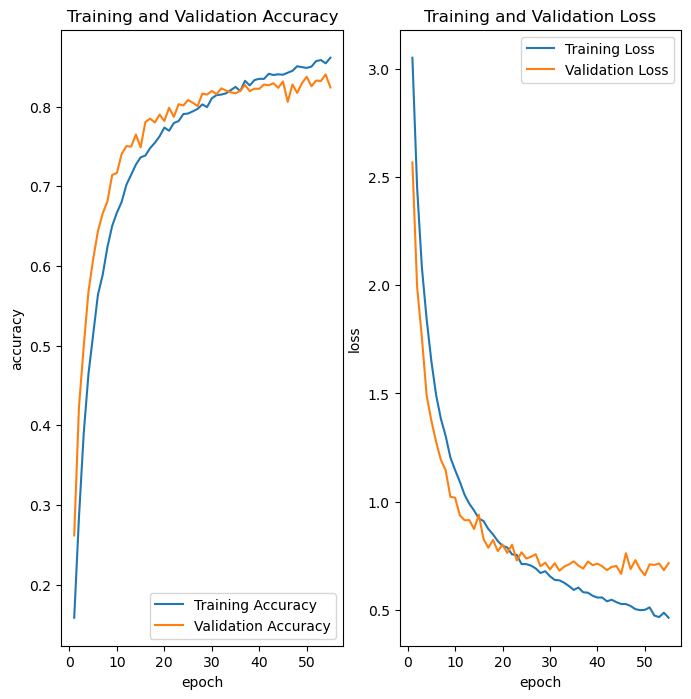

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(1, 19)
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
#plt.ylim(0, 1) 
plt.show()


In [46]:
model.save('trained model.h5')

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TypeError: Image data of dtype object cannot be converted to float

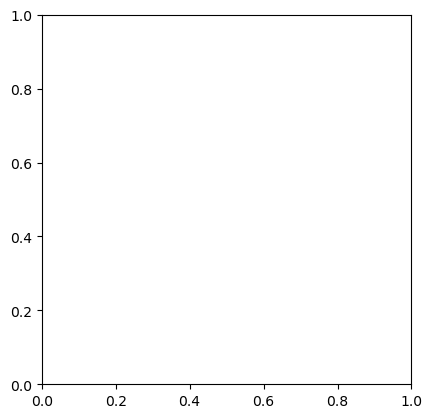

In [47]:
#the x and the y-ticks are used to remove the scaling on both axes
import cv2
image_path='/content/drive/MyDrive/dataset/Courteney_Cox/228.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#loading the image
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(180,180))
#converting the image in array form
input_arr=tf.keras.preprocessing.image.img_to_array(image)
#converting single image to batch
input_arr = np.expand_dims(input_arr, axis=0)
prediction = model.predict(input_arr)

1/1 [==============================] - 0s 184ms/step


In [ ]:
print(prediction[0])

[ 22.8208     -8.226202    5.6560817  11.920807    3.2363548  -2.6520057
   5.8599167  -4.481085    8.03702     2.6316319  -8.907878  -11.937628
  -7.342963    7.810904   13.779201   -8.738114   -4.715404   -5.657084
  -4.647932  -11.128436  -54.438408    2.5878203 -26.309559   -5.48905
  -2.7343614  12.23238    -3.3358836  -0.3679823 -11.380721  -10.205061
  -4.0157266]


In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False


)

Found 16065 files belonging to 31 classes.


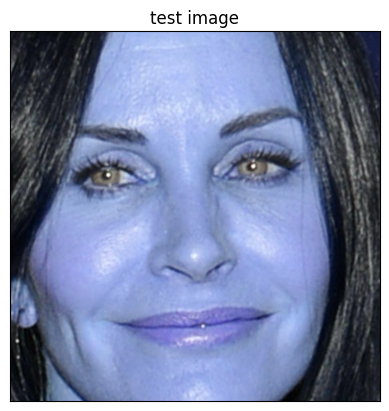

In [ ]:
#displayiing the iamge to test the model
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
result_index=np.where(prediction[0]==max(prediction[0]))
print(result_index[0])

[0]


In [ ]:
print('It is  {}'.format(test_set.class_names[result_index[0][0]]))

It is  Courteney_Cox


In [ ]:
#to predict on new data


In [ ]:
#newperson_url = "https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg"
newperson_url="https://upload.wikimedia.org/wikipedia/commons/a/ab/Lira_%28South_African_singer%29.jpg"
newperson_path = tf.keras.utils.get_file('Lira_%28South_African_singer%29.jpg', origin=newperson_url)
#newperson_path = tf.keras.utils.get_file('Bill_Gates_2017_%28cropped%29.jpg', origin=newperson_url)

img = tf.keras.utils.load_img(
    newperson_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to random_person with a 58.03 percent confidence.
